# Bool
закодировать
# Questions
result_name оставить нул?

# Импорт основных библиотек и датасета

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# graph
import networkx as nx
from pyvis.network import Network

In [2]:
PATHES = ["./with_closed_ations_as________select_app_2018_X5_STORES.csv", "./with_closed_ations_as________select_app_2019_X5_STORES.csv", "./with_closed_ations_as________select_app_2020_X5_STORES.csv"]
# df = pd.read_csv(PATH)
df = pd.DataFrame()
for path in PATHES:
    df1 = pd.read_csv(path)
    df = pd.concat([df, df1])
    
df['action_date'] = pd.to_datetime(df['action_date'])
df = df[df['position_name'] == 'Продавец-кассир']

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df2020 = pd.read_csv(PATHES[2])
df2020 = df2020[df2020['position_name'] == 'Продавец-кассир']

# Предобработка

In [30]:
# df[df['activity_name'] == 'Провести гайд-интервью НОО']
# df = df[df['position_name'] == 'Продавец-кассир']

# Предварительный анализ

In [5]:
df['activity_name'].unique()

array([nan, 'Узнать результаты СБ', 'Провести первичную обработку',
       'Назначить время на оформление/медосмотр',
       'Подготовить анкету кандидата',
       'Узнать результаты интервью с руководителем',
       'Назначить интервью с руководителем', 'Проверка источника',
       'Узнать результаты приема',
       'Назначить время на оформление/медосмотр (недозвон)',
       'Вернуть в воронку', 'Проверка формы обращения',
       'Узнать результаты медосмотра',
       'Получить согласование повторного приема и отправить в СБ',
       'Назначить время на оформление', 'Вывести из черного списка',
       'Проверить выход на работу', 'Узнать результаты гайд-интервью',
       'Назначить время для гайд-интервью',
       'Узнать результаты группового собеседования и тестирования',
       'Назначить групповое собеседование и тестирование',
       'Предоставить обратную связь по кандидату'], dtype=object)

In [6]:
# df

In [220]:
# df.duplicated().sum()
# 0
# df[(df.duplicated(subset=['id_applicant','activity_name'], keep=False)&(df['id_applicant'] == 2753698))]
# df.sort_values(by=['id_applicant'], ascending = False)
# df[df['id_applicant'] == 2753698].sort_values(by=['action_date'], ascending = True)

In [8]:
df.isna().sum()

id_applicant              0
id_partner                0
id_log                    0
department_id             0
action_date               0
stage_name                0
activity_name       2244130
result_name         2300885
position_name             0
is_active_action          0
is_open_action            0
dtype: int64

In [9]:
print(len(df[df['stage_name'] == 'Создание кандидата']))
print(df[df['stage_name'] == 'Создание кандидата'].isna().sum())

1734982
id_applicant              0
id_partner                0
id_log                    0
department_id             0
action_date               0
stage_name                0
activity_name       1734982
result_name         1734982
position_name             0
is_active_action          0
is_open_action            0
dtype: int64


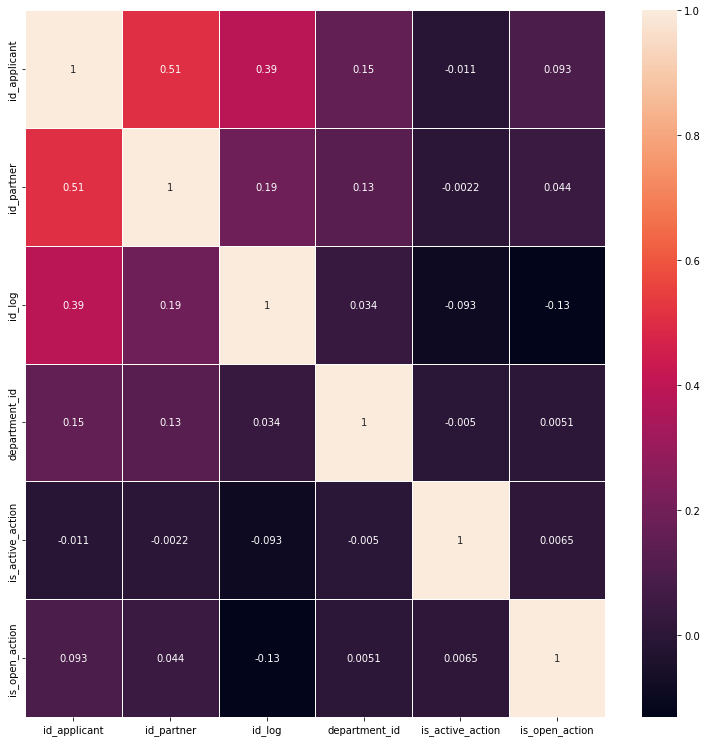

In [10]:
plt.subplots(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,linewidths = 1)
plt.show()

<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

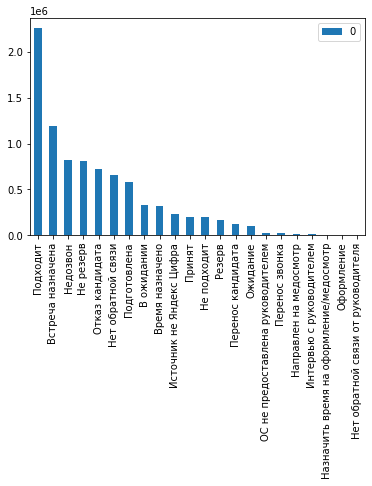

In [8]:
from collections import Counter
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
# positions = df['position_name'].unique()
column_name = 'result_name'
df_temp = df[df[column_name].notna()]
position_counts = Counter(df_temp[column_name])
df_pos =  df_temp.from_dict(position_counts, orient='index')
df_pos = df_pos.sort_values(by=[0], ascending = False)

plt.figure(figsize=(20, 20))
df_pos[df_pos[0]>5000].plot(kind='bar')

In [9]:
print(column_name)
df_pos[df_pos[0]>0]

result_name


,0
Подходит,2260593
Встреча назначена,1197127
Недозвон,819587
Не резерв,812373
Отказ кандидата,719264
Нет обратной связи,653503
Подготовлена,581508
В ожидании,332653
Время назначено,315608
Источник не Яндекс Цифра,233849


# изменение bool значений

In [13]:
df["is_active_action"] = df.is_active_action.replace({True: 1, False: 0})
df["is_open_action"] = df.is_open_action.replace({True: 1, False: 0})
df

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
0,3080432,2883423,-1,9044,2018-10-16 18:11:10.003180+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
1,2873477,2761171,-1,32087,2018-08-15 10:36:32.936322+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
2,2896621,2776555,-1,32087,2018-08-22 14:09:27.083354+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
3,2906437,2782282,-1,32087,2018-08-24 15:55:27.912704+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
4,2965200,2816229,-1,32087,2018-09-11 15:00:49.242929+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
...,...,...,...,...,...,...,...,...,...,...,...
739675,4825142,2952699,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739676,4736341,936507,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739678,4782853,2753502,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739679,4769924,3823657,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1


# Статистика

In [6]:
# Сортируем по аппликантам и по времени
df.sort_values(by=['id_applicant','action_date'], ascending = [False,True], inplace = True)
df.reset_index(inplace = True)

# action_time
indexes = pd.RangeIndex(len(df) - 1)
df['action_time'] = (df.iloc[indexes + 1]['action_date'].reset_index(drop = True) - df['action_date']).dt.total_seconds()/60/60/24 # In days
df['action_time'].iloc[df[df['id_applicant'] !=  df.iloc[indexes+1].append({'id_applicant': 0}, ignore_index = True)['id_applicant'].reset_index(drop = True)].index] = None

In [16]:
df.loc[df['result_name'] == 'Подходит', 'is_fits'] = 1
df['is_fits'].fillna(0, inplace = True)
df['is_fits'].mean()

0.2029239232211629

In [17]:
applicants_g =  df.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum()
applicants_g.describe()

count    1.574825e+06
mean     2.067071e+01
std      6.390311e+01
min      1.770833e-08
25%      1.862209e-01
50%      3.992136e+00
75%      1.022373e+01
max      8.352003e+02
Name: action_time, dtype: float64

In [39]:
applicants_g =  df.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time', 'is_fits'].sum()
applicants_g[applicants_g['is_fits']>0].describe()

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,action_time,is_fits
count,1.163826e+06,1.163826e+06
mean,2.425773e+01,1.942291e+00
std,6.866081e+01,1.160305e+00
min,3.864446e-05,1.000000e+00
25%,1.302877e+00,1.000000e+00
50%,5.934152e+00,1.000000e+00
75%,1.301065e+01,3.000000e+00
max,8.352003e+02,1.600000e+01


In [40]:
applicants_g[applicants_g['is_fits']==0].describe()

,action_time,is_fits
count,4.109990e+05,410999.0
mean,1.051332e+01,0.0
std,4.645489e+01,0.0
min,1.770833e-08,0.0
25%,2.642896e-04,0.0
50%,2.770222e-03,0.0
75%,3.181616e+00,0.0
max,8.050382e+02,0.0


In [219]:
# df['action_time'][df['action_time'] < 0] = None
stage_threshold = 100
stages_g =  df.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
# stages_g[stages_g['count'] > stage_threshold]

In [217]:
activity_threshold = 100
activities_g =  df.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
# activities_g[activities_g['count'] > activity_threshold]

In [218]:
result_threshold = 0
results_g =  df.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
# results_g[results_g['count'] > activity_threshold]

In [149]:
stage_name = 'Интервью с руководителем'
stage_series = df['action_time'][df['stage_name'] == stage_name]
time_threshold = stages_g.loc[stage_name]['75%']

# df.iloc[stage_series[stage_series.values > time_threshold].index]

In [78]:
# df.iloc[df[df['stage_name'] == 'Групповое собеседование и тестирование'].index+1]
# print(len(stages[stages['count'] > stage_threshold]))
# df.iloc[df[df['action_time'] < 0].index + 1]
# df[df['activity_name'] == 'Провести первичную обработку']

In [214]:
import matplotlib.pyplot as plt

def showHist(data, grouped_data, column_name = 'stage_name', is_special = True, xy = 4, col_threshold = 100):
    
    fig, axs = plt.subplots(xy, xy, figsize=(20,15))
    i = 0
    not_special_const = 5
    
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        time_threshold = not_special_const
        if is_special and col in grouped_data.index:
            time_threshold = grouped_data.loc[col]['75%']
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            i+=1
#             axs[x,y].set_ylabel('Кол-во')
            axs[x,y].set_xlabel(f'{col}, {col_len}')
            series[series.values < time_threshold].hist(ax=axs[x,y],bins=100)
        print('.', end = '')
    plt.show()

def checkShowHist(data, grouped_data, column_name = 'stage_name', is_special = True, xy = 4, col_threshold = 100):
    
    not_special_const = 5
    if is_special and len(data[column_name].unique()) != len(grouped_data):
        print('Not all columns in grouped_data')
    
    i = 0
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            if x > xy or y > xy:
                print(f'Too many columns in data for diagramm {xy}*{xy}')                
            i+=1

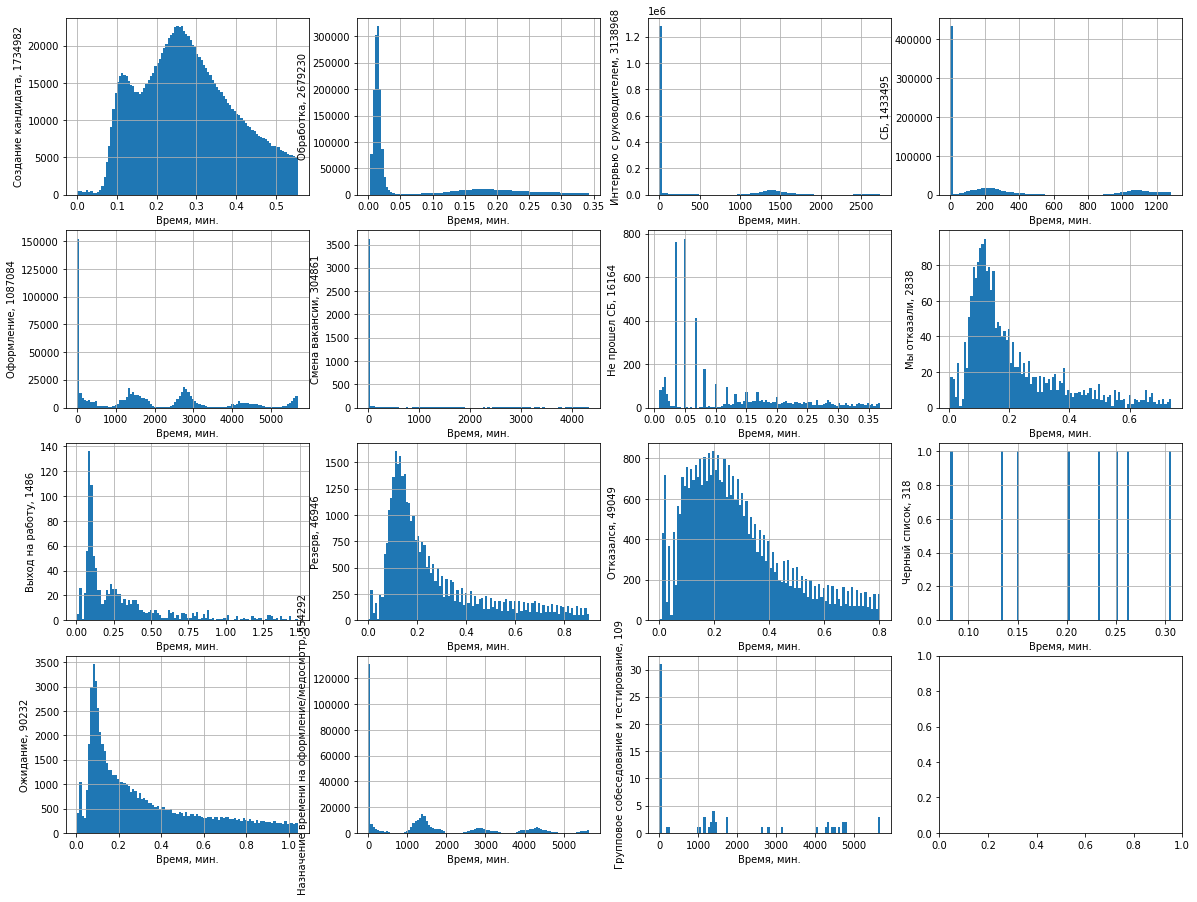

In [173]:
showHist(df, stages_g)

......................

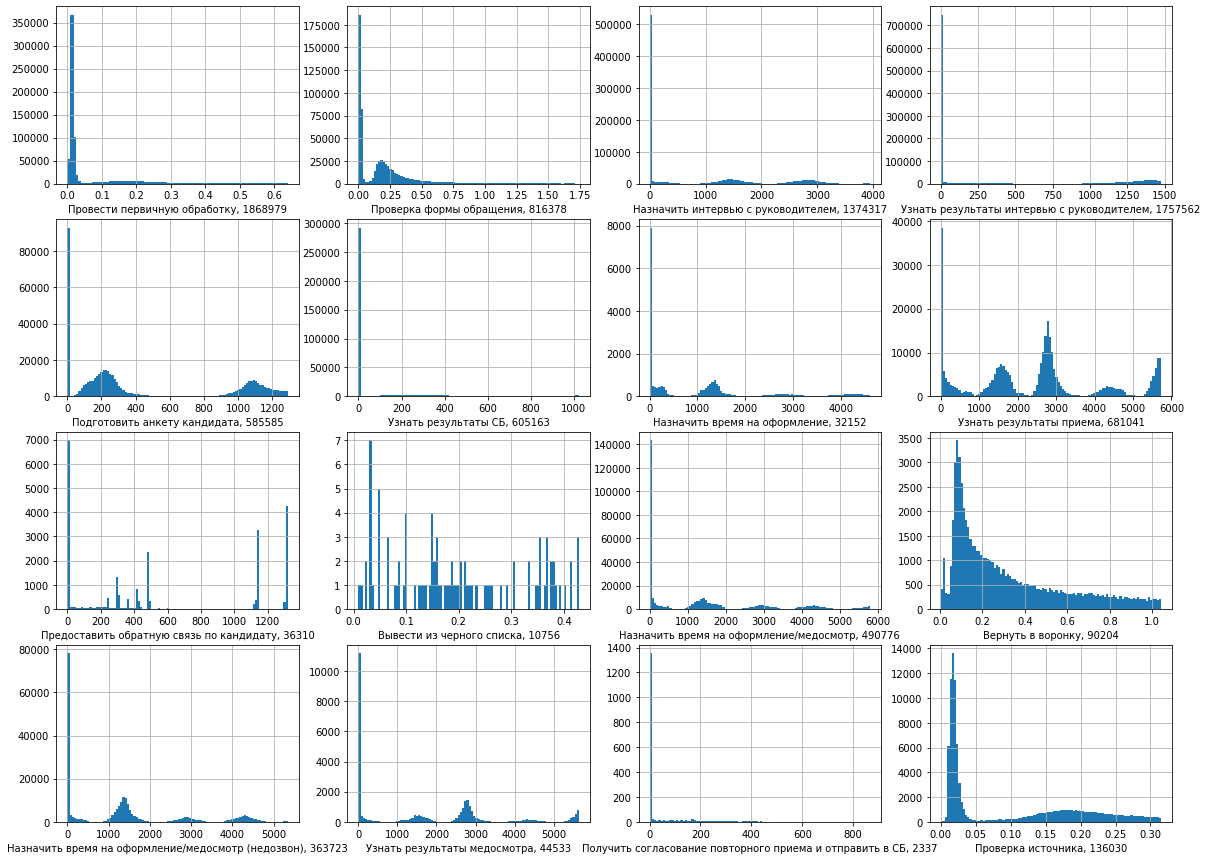

In [215]:
showHist(df, activities_g, 'activity_name', True)

.........................................

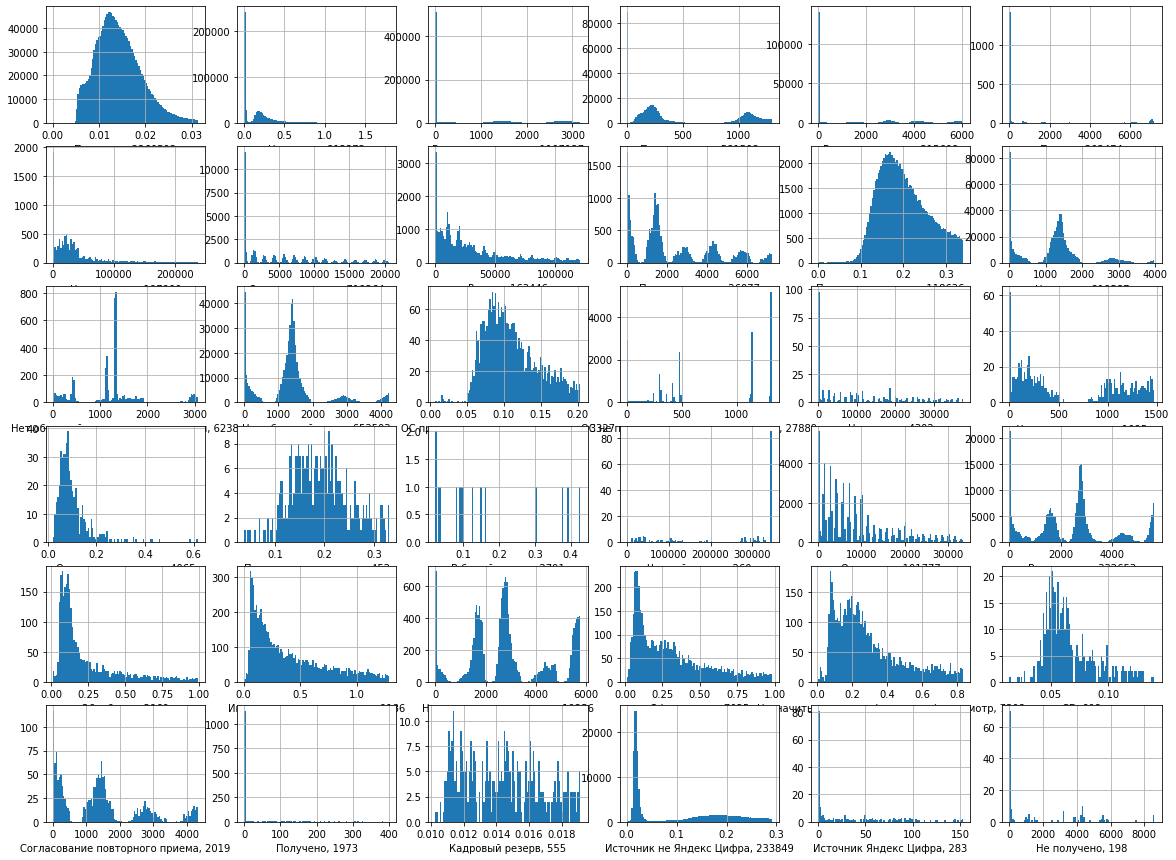

In [216]:
showHist(df, results_g, 'result_name', True, 6)

# Создание связи по активностям аппликанта

читаем только файл 2020 года

In [17]:
df2020 = pd.read_csv(PATHES[2])
df2020 = df2020[df2020['position_name'] == 'Продавец-кассир']

# сортируем, чтобы видеть активности по одному аппилканту в соответствии с датой и временем
df2020.sort_values(by=['id_applicant','action_date'], ascending = [False,True], inplace = True)

# делаем ресет индекс, чтоб было удобней сортировать и работать со строками
df2020.reset_index(inplace= True)
# создаем колонку next_id, куда будем записывать эти самые айдишники,уже по отсортированному датафрейму
df2020['next_id']= df2020.index + 1
# берем index stage_name`a на создании кандидата, а затем делаем -1, и записываем в оканчивающиеся поля значения NaN
df2020.iloc[df2020[df2020['stage_name'] == 'Создание кандидата'].index]
df2020['next_id'].iloc[df2020[df2020['stage_name']== 'Создание кандидата'].index -1] = None

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
df2020_short = pd.DataFrame(df2020[['stage_name', 'activity_name', 'result_name', 'next_id']])
df2020_short.dropna(subset=['next_id'], inplace = True)

next_columns = {'stage_name':'next_stage','activity_name':'next_activity','result_name':'next_result'}
for next_ in next_columns.items():
    next_steps = df2020[next_[0]].loc[df2020_short['next_id']]
    next_steps.index = df2020_short.index
    df2020_short[next_[1]] = next_steps

df2020_short

,stage_name,activity_name,result_name,next_id,next_stage,next_activity,next_result
0,Создание кандидата,NaN,NaN,1.0,Обработка,Провести первичную обработку,Подходит
1,Обработка,Провести первичную обработку,Подходит,2.0,Обработка,Проверка формы обращения,Не резерв
2,Обработка,Проверка формы обращения,Не резерв,3.0,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена
3,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,4.0,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит
4,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,5.0,СБ,Подготовить анкету кандидата,Подготовлена
...,...,...,...,...,...,...,...
527445,Создание кандидата,NaN,NaN,527446.0,Не прошел СБ,Вывести из черного списка,В белый список
527456,Создание кандидата,NaN,NaN,527457.0,Не прошел СБ,Вывести из черного списка,В белый список
527489,Создание кандидата,NaN,NaN,527490.0,Не прошел СБ,Вывести из черного списка,В белый список
527502,Создание кандидата,NaN,NaN,527503.0,Не прошел СБ,Вывести из черного списка,В белый список


# Построение графов

In [149]:
df2020_stages = df2020_short.groupby(['stage_name','next_stage']).size().reset_index()

G = nx.Graph()
G=nx.from_pandas_edgelist(df2020_stages, 'stage_name', 'next_stage')
nt = Network('1000px', '1000px')
nt.from_nx(G)
nt.show('stage.html')

In [150]:
df2020_activity = df2020_short.groupby(['activity_name','next_activity']).size().reset_index()

G = nx.Graph()
G=nx.from_pandas_edgelist(df2020_activity, 'activity_name', 'next_activity')
nt = Network('1000px', '1000px')
nt.from_nx(G)
nt.show('activity.html')

In [151]:
df2020_result = df2020_short.groupby(['result_name','next_result']).size().reset_index()

G = nx.Graph()
G=nx.from_pandas_edgelist(df2020_result, 'result_name', 'next_result')
nt = Network('1000px', '1000px')
nt.from_nx(G)
nt.show('result.html')

# Замечание! 
заменить float значения колонки next_id на int

In [14]:
#df2020["next_id"] = df2020["next_id"].astype(int) # пишет что не может NaN сконвертить в инт, тут надо подумать

А здесь мы просто смотрели, что-то)) и думали, стоит ли убирать медосмотр или будем его учитывать. В итоге мы решили что будем брать только данные за 2020 год

In [33]:
df2020[df2020['activity_name']== 'Создание кандидата'].index

Int64Index([], dtype='int64')

In [16]:
df12 = df11

In [ ]:
#df12.loc[(for appl in df12['id_applicant']), 'activity_name'] = df12['activity_name']

In [ ]:
df

In [27]:
df[df['stage_name'] == 'Назначение времени на оформление/медосмотр' ]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
1131318,2938092,2800942,15154266,25031,2018-09-06 09:05:54.978772+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,1,0
1131328,2586861,2599642,12963548,25031,2018-05-17 17:12:58.780336+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Резерв,Продавец-кассир,1,0
1131380,2294844,2445219,11412346,27472,2018-02-06 09:23:02.652827+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,1,0
1131400,2575961,2104304,12877577,9690,2018-05-14 12:47:09.688594+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,1,0
1131434,2557905,1873453,12798772,29597,2018-05-08 15:13:49.526816+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр (недоз...,Время назначено,Продавец-кассир,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6353557,3359984,3050771,-1,12178,2020-04-23 15:38:59.865221+00,Назначение времени на оформление/медосмотр,Узнать результаты медосмотра,NaN,Продавец-кассир,1,1
6370568,3364380,3053067,-1,11870,2020-04-23 15:38:59.865221+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр (недоз...,NaN,Продавец-кассир,1,1
6370622,3520204,3141403,-1,7481,2020-04-23 15:38:59.865221+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр (недоз...,NaN,Продавец-кассир,1,1
6370714,3456712,3105692,-1,8963,2020-04-23 15:38:59.865221+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр (недоз...,NaN,Продавец-кассир,1,1


In [31]:
по stage_name других годов

array(['Создание кандидата', 'СБ', 'Обработка',
       'Назначение времени на оформление/медосмотр',
       'Интервью с руководителем', 'Оформление', 'Смена вакансии',
       'Отказался', 'Ожидание', 'Резерв', 'Не прошел СБ', 'Мы отказали',
       'Выход на работу', 'Кадровый резерв', 'Черный список',
       'Гайд-интервью', 'Групповое собеседование и тестирование',
       'Выход состоялся'], dtype=object)

In [34]:
по stage_name 2020

array(['Создание кандидата', 'Интервью с руководителем', 'Обработка',
       'Оформление', 'Смена вакансии', 'СБ', 'Не прошел СБ', 'Отказался',
       'Мы отказали', 'Резерв', 'Выход на работу', 'Черный список'],
      dtype=object)